学习现代卷积神经网络。

# 深度卷积神经网络（AlexNet）

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10),

    # Softmax层
    nn.Softmax(dim=1)
)

In [8]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

# Conv2d output shape:	 torch.Size([1, 96, 54, 54])
# ReLU output shape:	 torch.Size([1, 96, 54, 54])
# MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
# Conv2d output shape:	 torch.Size([1, 256, 26, 26])
# ReLU output shape:	 torch.Size([1, 256, 26, 26])
# MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
# Conv2d output shape:	 torch.Size([1, 384, 12, 12])
# ReLU output shape:	 torch.Size([1, 384, 12, 12])
# Conv2d output shape:	 torch.Size([1, 384, 12, 12])
# ReLU output shape:	 torch.Size([1, 384, 12, 12])
# Conv2d output shape:	 torch.Size([1, 256, 12, 12])
# ReLU output shape:	 torch.Size([1, 256, 12, 12])
# MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
# Flatten output shape:	 torch.Size([1, 6400])
# Linear output shape:	 torch.Size([1, 4096])
# ReLU output shape:	 torch.Size([1, 4096])
# Dropout output shape:	 torch.Size([1, 4096])
# Linear output shape:	 torch.Size([1, 4096])
# ReLU output shape:	 torch.Size([1, 4096])
# Dropout output shape:	 torch.Size([1, 4096])
# Linear output shape:	 torch.Size([1, 10])

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [3]:
batch_size = 128

# 这里使用Fashion-MNIST数据集来训练AlexNet
# 由于Fashion-MNIST的图像大小为28*28，且通道数为1，
# 因此需要将图像大小调整为224*224，通道数为1。
# 这可以通过在数据集上应用转换来实现。
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

100.0%
100.0%
100.0%
100.0%


In [ ]:
# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    
    # 定义正确预测的数量和总样本数
    accury_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accury_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accury_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).sum()  # 计算平均损失
            train_l_sum += l.item()
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

lr, num_epochs = 0.0001, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, "mps")

libc++abi: terminating due to uncaught exception of type std::__1::system_error: Broken pipe
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x11896e520>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1627, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

KeyboardInterrupt: 

云端环境使用cuda训练，修改一下代码：

In [10]:
# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

lr, num_epochs = 0.01, 20
train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")

AssertionError: Torch not compiled with CUDA enabled

# 使用块的网络（VGG）

In [ ]:
import torch
from torch import nn

def vgg_block(num_convs, in_channels, out_channels):
    """VGG块"""
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [13]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [14]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

In [ ]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

# Sequential output shape:	 torch.Size([1, 64, 112, 112])
# Sequential output shape:	 torch.Size([1, 128, 56, 56])
# Sequential output shape:	 torch.Size([1, 256, 28, 28])
# Sequential output shape:	 torch.Size([1, 512, 14, 14])
# Sequential output shape:	 torch.Size([1, 512, 7, 7])
# Flatten output shape:	 torch.Size([1, 25088])
# Linear output shape:	 torch.Size([1, 4096])
# ReLU output shape:	 torch.Size([1, 4096])
# Dropout output shape:	 torch.Size([1, 4096])
# Linear output shape:	 torch.Size([1, 4096])
# ReLU output shape:	 torch.Size([1, 4096])
# Dropout output shape:	 torch.Size([1, 4096])
# Linear output shape:	 torch.Size([1, 10])

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [16]:
batch_size = 128

# 这里使用Fashion-MNIST数据集来训练AlexNet
# 由于Fashion-MNIST的图像大小为28*28，且通道数为1，
# 因此需要将图像大小调整为224*224，通道数为1。
# 这可以通过在数据集上应用转换来实现。
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

In [ ]:
# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

# 开始训练
lr, num_epochs = 0.05, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")

# 网络中的网络（NiN）

In [1]:
import torch
from torch import nn

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),  # 1x1卷积
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),  # 1x1卷积
        nn.ReLU()
    )

In [3]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten(),
    nn.Softmax(dim=1)  # Softmax层
)

In [4]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

# Sequential output shape:	 torch.Size([1, 96, 54, 54])
# MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
# Sequential output shape:	 torch.Size([1, 256, 26, 26])
# MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
# Sequential output shape:	 torch.Size([1, 384, 12, 12])
# MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
# Dropout output shape:	 torch.Size([1, 384, 5, 5])
# Sequential output shape:	 torch.Size([1, 10, 5, 5])
# AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
# Flatten output shape:	 torch.Size([1, 10])
# Softmax output shape:	 torch.Size([1, 10])

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])
Softmax output shape:	 torch.Size([1, 10])


In [5]:
# 定义超参数
lr, num_epochs, batch_size = 0.1, 10, 128

# 读取Fashion-MNIST数据集
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import torch
from torch import nn

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        # 减少了一层1x1卷积
        nn.Conv2d(out_channels, out_channels, kernel_size=1),  # 1x1卷积
        nn.ReLU()
    )

net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten(),
    nn.Softmax(dim=1)  # Softmax层
)

X = torch.rand(size=(1, 1, 224, 224))

for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

# Sequential output shape:	 torch.Size([1, 96, 54, 54])
# MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
# Sequential output shape:	 torch.Size([1, 256, 26, 26])
# MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
# Sequential output shape:	 torch.Size([1, 384, 12, 12])
# MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
# Dropout output shape:	 torch.Size([1, 384, 5, 5])
# Sequential output shape:	 torch.Size([1, 10, 5, 5])
# AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
# Flatten output shape:	 torch.Size([1, 10])
# Softmax output shape:	 torch.Size([1, 10])

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])
Softmax output shape:	 torch.Size([1, 10])


# 含并行连结的网络（GoogLeNet）

In [6]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l


class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)

In [12]:
# 定义模块1
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [ ]:
b2 = nn.Sequential(
    nn.Conv2d(64, 64, kernel_size=1),
    nn.ReLU(),
    nn.Conv2d(64, 192, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [9]:
b3 = nn.Sequential(
    Inception(192, 64, (96, 128), (16, 32), 32),
    Inception(256, 128, (128, 192), (32, 96), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [10]:
b4 = nn.Sequential(
    Inception(480, 192, (96, 208), (16, 48), 64),
    Inception(512, 160, (112, 224), (24, 64), 64),
    Inception(512, 128, (128, 256), (24, 64), 64),
    Inception(512, 112, (144, 288), (32, 64), 64),
    Inception(528, 256, (160, 320), (32, 128), 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [13]:
b5 = nn.Sequential(
    Inception(832, 256, (160, 320), (32, 128), 128),
    Inception(832, 384, (192, 384), (48, 128), 128),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
)

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10), nn.Softmax(dim=1))

In [ ]:
# 定义超参数
lr, num_epochs, batch_size = 0.1, 10, 128

# 读取Fashion-MNIST数据集
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")

# 批量规范化

In [1]:
import torch
from torch import nn
from d2l import torch as d2l


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 通过is_grad_enabled来判断当前模式是训练模式还是预测模式
    if not torch.is_grad_enabled():
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。
            # 这里我们需要保持X的形状以便后面可以做广播运算
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # 训练模式下，用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 缩放和移位
    return Y, moving_mean.data, moving_var.data

In [5]:
class BatchNorm(nn.Module):
    # num_features：完全连接层的输出数量或卷积层的输出通道数。
    # num_dims：2表示完全连接层，4表示卷积层
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # 非模型参数的变量初始化为0和1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var
        # 复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [16]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10)
)

epoch 1, loss 2.257, train acc 0.200, test acc 0.199
epoch 2, loss 2.128, train acc 0.226, test acc 0.223
epoch 3, loss 2.072, train acc 0.227, test acc 0.226
epoch 4, loss 2.028, train acc 0.272, test acc 0.268
epoch 5, loss 1.983, train acc 0.254, test acc 0.256
epoch 6, loss 1.958, train acc 0.252, test acc 0.249
epoch 7, loss 1.941, train acc 0.295, test acc 0.296
epoch 8, loss 1.924, train acc 0.281, test acc 0.279
epoch 9, loss 1.879, train acc 0.302, test acc 0.301
epoch 10, loss 1.855, train acc 0.285, test acc 0.283


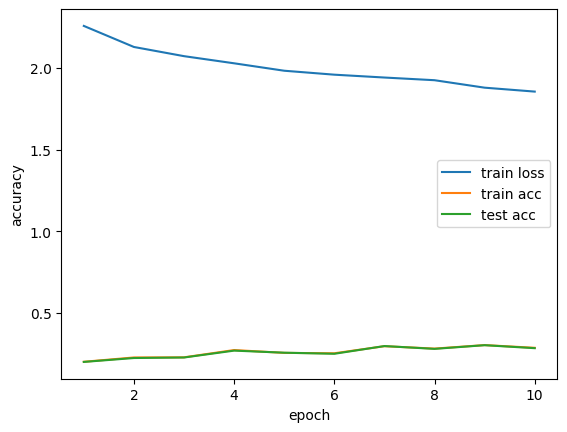

([2.2569621520996095,
  2.128013939921061,
  2.071741628011068,
  2.028006018066406,
  1.9825226974487304,
  1.9583332350413005,
  1.9408618341445922,
  1.924431886736552,
  1.878732918294271,
  1.85470066019694],
 [0.1999,
  0.2263,
  0.22708333333333333,
  0.27168333333333333,
  0.2543666666666667,
  0.25198333333333334,
  0.29523333333333335,
  0.28065,
  0.3020833333333333,
  0.28545],
 [0.199,
  0.2229,
  0.2261,
  0.2682,
  0.2555,
  0.2488,
  0.2962,
  0.2789,
  0.3015,
  0.2832])

In [25]:
lr, num_epochs, batch_size = 0.1, 10, 256

# 这里使用Fashion-MNIST数据集数为1。
# 这可以通过在数据集上应用转换来实现。
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        # transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        # transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    
    # 定义正确预测的数量和总样本数
    accury_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accury_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accury_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss()  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y)
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "mps")

In [26]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84, 10))

epoch 1, loss 0.926, train acc 0.764, test acc 0.752
epoch 2, loss 0.593, train acc 0.793, test acc 0.778
epoch 3, loss 0.510, train acc 0.799, test acc 0.784
epoch 4, loss 0.464, train acc 0.792, test acc 0.772
epoch 5, loss 0.430, train acc 0.817, test acc 0.804
epoch 6, loss 0.405, train acc 0.853, test acc 0.837
epoch 7, loss 0.385, train acc 0.848, test acc 0.832
epoch 8, loss 0.368, train acc 0.846, test acc 0.829
epoch 9, loss 0.355, train acc 0.843, test acc 0.829
epoch 10, loss 0.343, train acc 0.806, test acc 0.797


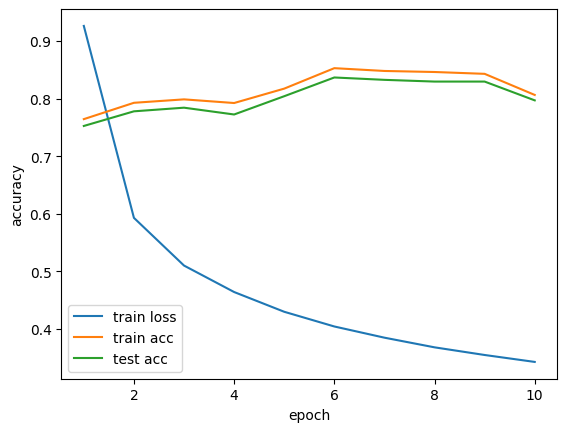

([0.9259359397570293,
  0.5929888911247253,
  0.5102295838832855,
  0.4643275456428528,
  0.43007720138231914,
  0.40456520841916405,
  0.3851431262175242,
  0.3683874034086863,
  0.35511772917111717,
  0.34308586967786153],
 [0.76425,
  0.7925833333333333,
  0.7985333333333333,
  0.7922,
  0.8171666666666667,
  0.85265,
  0.8478,
  0.846,
  0.8428166666666667,
  0.8062166666666667],
 [0.7524,
  0.7778,
  0.7841,
  0.7723,
  0.804,
  0.8365,
  0.8324,
  0.8294,
  0.8294,
  0.7968])

In [27]:
lr, num_epochs, batch_size = 0.1, 10, 256

# 这里使用Fashion-MNIST数据集数为1。
# 这可以通过在数据集上应用转换来实现。
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        # transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        # transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    
    # 定义正确预测的数量和总样本数
    accury_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accury_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accury_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss()  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y)
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "mps")

# ResNet

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class Residual(nn.Module):  #@save
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3,3)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
Y.shape

# torch.Size([4, 3, 6, 6])

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(3,6, use_1x1conv=True, strides=2)
blk(X).shape

# torch.Size([4, 6, 3, 3])

torch.Size([4, 6, 3, 3])

In [31]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [36]:
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

In [37]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

In [38]:
net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 10))

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

# Sequential output shape:	 torch.Size([1, 64, 56, 56])
# Sequential output shape:	 torch.Size([1, 64, 56, 56])
# Sequential output shape:	 torch.Size([1, 128, 28, 28])
# Sequential output shape:	 torch.Size([1, 256, 14, 14])
# Sequential output shape:	 torch.Size([1, 512, 7, 7])
# AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
# Flatten output shape:	 torch.Size([1, 512])
# Linear output shape:	 torch.Size([1, 10])

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
# 定义超参数
lr, num_epochs, batch_size = 0.05, 10, 256

# 读取Fashion-MNIST数据集
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")

# DenseNet

In [40]:
import torch
from torch import nn


def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels),
        nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1)
    )

In [42]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(
                num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # 连接通道维度上每个块的输入和输出
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

# torch.Size([4, 23, 8, 8])

torch.Size([4, 23, 8, 8])

In [44]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2)
    )

In [ ]:
blk = transition_block(23, 10)
blk(Y).shape

# torch.Size([4, 10, 4, 4])

torch.Size([4, 10, 4, 4])

In [46]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [47]:
# num_channels为当前的通道数
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    # 上一个稠密块的输出通道数
    num_channels += num_convs * growth_rate
    # 在稠密块之间添加一个转换层，使通道数量减半
    if i != len(num_convs_in_dense_blocks) - 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2

In [48]:
net = nn.Sequential(
    b1, *blks,
    nn.BatchNorm2d(num_channels), nn.ReLU(),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(num_channels, 10))

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 256

# 读取Fashion-MNIST数据集
import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=True, download=True,
    transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST', train=False, download=True
    , transform=transforms.Compose([
        transforms.Resize((96, 96)),  # 调整图像大小
        transforms.Grayscale(num_output_channels=1),  # 确保通道数=1
        transforms.ToTensor()  # 转换为张量
    ])
)
train_iter = torch.utils.data.DataLoader(
    train_dataset, batch_size, shuffle=True, num_workers=4
)
test_iter = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=False, num_workers=4
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式

        # 使用cuda
        if device is None:
            device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
            net.to(device)  # 将模型移动到设备
        else:
            device = torch.device(device)
            net.to(device)  # 将模型移动到设备

    
    # 定义正确预测的数量和总样本数
    accuracy_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accuracy_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accuracy_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('cuda' if torch.backends.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).mean()  # 计算平均损失
            train_l_sum += l.item() * y.shape[0]  # 累加损失
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

train_ch6(net, train_iter, test_iter, num_epochs, lr, "cuda")